# Section 0: pyRosetta Setup
在我们运行**任何** pyrosetta 代码之前，我们需要设置pyrosetta环境。这可以通过运行以下代码来完成。
```python
from pyrosetta import init
init()
```
这个时候会出现
```
┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
```
为开头的一段文字，这说明你已经成功安装了pyrosetta并且可以开始使用了。

---

可以通过指定 `'silent=True'` 来关闭这段文字的输出。

```python
from pyrosetta import init
init(silent=True)
```
---

如果你不想看到pyrosetta的任何输出，可以在init()函数中加入 `'-mute all'` 参数，这样pyrosetta就不会输出任何信息了。当然这只推荐在你完全了解你的代码会做什么的情况下使用。

```python
from pyrosetta import init
init('-mute all')
```

除此之外，你还可以通过 `init()` 函数的参数来设置其他的选项，比如 `'-extra_res_fa path/to/your/params'` 来加载 `.params` 文件(一般用于定义小分子和非标准氨基酸)。更多的选项可以参考[RosettaCommons所提供的文档](https://docs.rosettacommons.org/docs/latest/full-options-list)。


In [27]:
from pyrosetta import init
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.conda.ubuntu.cxx11thread.serialization.Ubuntu.python312.Release 2024.42+release.3366cf78a3df04339d1982e94531b77b098ddb99 2024-10-11T08:24:04] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.conda.ubuntu.cxx11thread.ser

# Section 1: Pose
在Rosetta中，Pose是管理蛋白质信息的中心，可以描述蛋白质一到四级结构所有的信息。而且这些信息是分层管理的比如:

- Conformation: 负责管理原子类型(AtomType)、氨基酸类型(ResidueType)、氨基酸的原子坐标(xyz)、氨基酸连接方式的定义(FoldTree/AtomTree)等，这部分构成了蛋白质构象的所有物理信息。(最重要)
- Energy: 负责管理氨基酸直接的能量计算所需的信息(EnergyGraph/energies)
- ConstraintSet: 负责管理原子间的约束信息(constraints)
- DataCache: 负责管理用户自定义的信息

## 1.1 Pose 的读取与写出
Rosetta兼容最常规的两种记录结构格式：PDB和Silent文件：

- PDB文件可以从https://www.rcsb.org/ 数据库中获取；
- Silent文件为Rosetta开发的pose压缩文件（其功能也是储存结构等信息，但其体积比PDB小了10倍之多，非常适合在超算中心进行的数据文件的传输）

获取 pose 的函数主要有以下几种：

- `pose_from_pdb(pdb_file_path)`：从PDB文件中读取pose
- `pose_from_sequence(sequence)`：从氨基酸序列中构建pose
- `pose_from_rcsb(pdb_id)`：从RCSB数据库中远程获取pdb code对应的pose

在这里，我们主要介绍来源于PDB文件的Pose读取方法。

In [28]:
from pyrosetta import (
    pose_from_pdb,
)
from pyrosetta.toolbox import pose_from_rcsb

In [29]:
# pose_from_rcsb
#   - 接收的参数为 RCSB 数据库中的 PDB ID (4位)
#   - 返回一个 Pose 对象
# 注意： 该函数会在当前目录下下载 RCSB 数据库中的 PDB 文件，因此需要保证网络畅通
#       在运行下述代码后，当前目录下会出现名为 1QYS.pdb 与 1QYS.clean.pdb 的文件
#       其中 1QYS.clean.pdb 是经过 PyRosetta 清洗过的 PDB 文件
#           - clean 发生了什么？ “Extract all ATOM and TER records in a PDB file and write them to a new file”
#                               （也就是说小分子、水分子等非蛋白质信息会被去除）（此外，缺失的原子会被rosetta补全）
pose = pose_from_rcsb("1QYS")

core.import_pose.import_pose: File '1QYS.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue PHE 15
core.conformation.Conformation: [ WARNING ] m

In [30]:
# pose_from_pdb
#   - 接收的参数为 PDB 文件的路径
#   - 返回一个 Pose 对象
pose = pose_from_pdb("./1QYS.clean.pdb")

core.import_pose.import_pose: File './1QYS.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue PHE 15
core.conformation.Conformation: [ WARNING ]

如果我们通过 `print(pose)` 来查看pose的信息，我们会发现有以下信息被打印出来：
- PBD file name: PDB文件的名字
- Total residues: 残基的总数
- Sequence: 氨基酸序列
- Fold tree: 折叠树
    - EDGE 1 91 -1 代表从1号氨基酸到91号氨基酸的连接方式为“共价连接”

In [31]:
print(pose)

PDB file name: ./1QYS.clean.pdb
Total residues: 91
Sequence: DIQVQVNIDDNGKNFDYTYTVTTESELQKVLNELDYIKKQGAKRVRISITARTKKEAEKFAAILIKVFAELGYNDINVTFDGDTVTVEGQL
Fold tree:
FOLD_TREE  EDGE 1 91 -1 


对于Pose的写出，我们可以使用 `pose.dump_pdb(pdb_file_path)` 函数来将Pose写出到PDB文件中。

In [32]:
# 运行后，当前目录下会出现名为 1QYS.clean.dump.pdb 的文件
pose.dump_pdb("1QYS.clean.dump.pdb")

True

## 1.2 通过 Pose 获取蛋白质的信息

### PDBinfo
PDBinfo是Pose和PDB中信息交换和储存的重要媒介。Pose通常是从PDB文件中衍生出来的，除了原子的坐标信息以外，PDB文件中包含了许多额外的信息，而这些信息是储存在PDBinfo中。比如温度因子数据(bfactor)、晶体解析数据(crystinfo)、原子的占用率(occupancy)等。使用PDBinfo可以实现Pose编号与PDB编号的转换以及Pose的序列信息获取等功能。如果Pose中的氨基酸发生了插入和删除，又或者其他的PDB相关信息发生了变化，更新的信息就需要从当前的Pose中获取并转换成PDBinfo的数据，因此PDBinfo和Pose是实时相互连通的两个信息储存器。

In [33]:
pdb_info = pose.pdb_info()

在 PDB 文件中，每个氨基酸有着自己的编号，这个编号由 Chain ID 和 Residue ID 组成，例如 ‘B23’ 表示 Chain B 的第 23 个氨基酸。而在 Pose 中，氨基酸的编号是从 1 开始的，例如 “我有一个两条链组成的蛋白质，链A有100个氨基酸，链B有50个氨基酸，那么链B的第一个氨基酸在Pose中的编号是101”。
我们可以通过 `pose.pdb_info().pdb2pose(chain_id, res_id)` 与 `pose.pdb_info().pose2pdb(res_num)` 来进行编号的转换。

In [34]:
res_num = pdb_info.pdb2pose("A", 30)
print(res_num)

28


In [35]:
res_id_chain_id= pdb_info.pose2pdb(30)
print(res_id_chain_id)

res_id, chain_id = res_id_chain_id.split()
print("This residue is", f"{res_id}th", "residue in chain", chain_id)

32 A 
This residue is 32th residue in chain A


在PDB文件中，chain ID是以字母表示的，而在Pose中，chain ID是以数字表示的。我们可以通过 `get_chain_id_from_chain(chain_id, pose)` 与 `get_chain_from_chain_id(chain_id, pose)` 来进行编号的转换。

In [36]:
from pyrosetta.rosetta.core.pose import get_chain_from_chain_id, get_chain_id_from_chain

chain = 'A'
chain_id = get_chain_id_from_chain(chain, pose)
print(chain_id)

chain_id = 1
chain = get_chain_from_chain_id(chain_id, pose)
print(chain)

1
A


通过PDBinfo，我们也可以根据某个氨基酸的 PDB 编号获得其所在链的 PDB 编号。

In [37]:
chain_res1 = pdb_info.chain(1)
print(chain_res1)

chain_res30 = pdb_info.chain(30)
print(chain_res1)

A
A


我们也可以通过 PDBinfo 获取其他 PDB 文件中的信息，比如温度因子数据(bfactor)、晶体解析数据(crystinfo)、原子的占用率(occupancy)等。

In [38]:
# 此处的 res 为 Pose 中的 residue index
# atom_index 为原子在该 residue 中的索引
# 在这里，我们获取了 Pose 中第一个 residue 的第一个原子的 B-factor 值
pdb_info.bfactor(res=1, atom_index=1)

174.51

In [39]:
# 打印出了 PDB 文件中的 CRYST1 行信息。如果 PDB 中没有指定，默认为 <CrystInfo>{0,0,0,90,90,90 : P 1}，含义请见 https://www.wwpdb.org/documentation/file-format-content/format33/sect8.html
crystinfo = pdb_info.crystinfo()
print(crystinfo)

<CrystInfo>{0,0,0,90,90,90 : P 1}


In [40]:
# 获取 Pose 中第一个 residue 的第一个原子的 occupancy 值
occupancy = pdb_info.occupancy(res=1, atom_index=1)
print(occupancy)

1.0


### Residue and Atom
Pose中的氨基酸和原子都是通过Residue和Atom对象来表示的。Residue对象包含了氨基酸的所有信息，比如氨基酸的类型、氨基酸的坐标、氨基酸的编号等。而Atom对象则包含了原子的所有信息，比如原子的类型、原子的坐标、原子的编号等。

In [41]:
# 可以通过 rosetta 的 residue index 获取 Pose 中的 residue
res = pose.residue(1)
# 通过 print，我们可以看到该 residue 的信息
print(res)

Residue 1: ASP:NtermProteinFull (ASP, D):
Base: ASP
 Properties: POLYMER PROTEIN CANONICAL_AA LOWER_TERMINUS SC_ORBITALS POLAR CHARGED NEGATIVE_CHARGE METALBINDING ALPHA_AA L_AA
 Variant types: LOWER_TERMINUS_VARIANT
 Main-chain atoms:  N    CA   C  
 Backbone atoms:    N    CA   C    O   1H   2H   3H    HA 
 Side-chain atoms:  CB   CG   OD1  OD2 1HB  2HB 
Atom Coordinates:
   N  : -4.522, 18.306, 17.409
   CA : -3.061, 18.228, 17.122
   C  : -2.664, 16.993, 16.324
   O  : -3.515, 16.306, 15.754
   CB : -2.261, 18.246, 18.422
   CG : -1.658, 19.6, 18.711
   OD1: -1.169, 20.249, 17.76
   OD2: -1.654, 20.007, 19.892
  1H  : -4.71545, 19.1355, 17.9329
  2H  : -5.03047, 18.3298, 16.5482
  3H  : -4.80138, 17.5051, 17.9386
   HA : -2.77857, 19.0965, 16.5263
  1HB : -2.90919, 17.9643, 19.2521
  2HB : -1.46025, 17.508, 18.3669
Mirrored relative to coordinates in ResidueType: FALSE



In [42]:
# 使用 res 对象的常见属性
for f in dir(res):
    if not f.startswith("_"):
        print(f)

Haro_index
Hpol_index
Hpos_apolar
Hpos_polar
Hpos_polar_sc
RNA_info
aa
abase2
accpt_pos
accpt_pos_sc
actcoord
actcoord_atoms
actual_residue_connection
all_bb_atoms
annotated_name
apply_transform_Rx_plus_v
atom
atom_base
atom_depends_on_lower
atom_depends_on_upper
atom_index
atom_is_backbone
atom_is_hydrogen
atom_is_polar_hydrogen
atom_name
atom_type
atom_type_index
atom_type_set
atomic_charge
atoms
atoms_with_orb_index
attached_H_begin
attached_H_end
backbone_aa
bonded_neighbor
bonded_orbitals
build_atom_ideal
build_orbital_xyz
carbohydrate_info
chain
chi
chi_atoms
chi_rotamers
clear_residue_connections
clone
clone_flipping_chirality
connect_atom
connect_map
connect_map_size
connected_residue_at_lower
connected_residue_at_resconn
connected_residue_at_upper
connection_distance
connection_incomplete
connections_match
connections_to_residue
copy_residue_connections
copy_residue_connections_from
create_residue
create_rotamer
cut_bond_neighbor
data
data_ptr
fill_missing_atoms
first_adjacent

In [43]:
# 可以看到，residue 对象中有很多属性，这里我们打印出了其中常用的一些属性，其他很多我也没用过 :(
print("res.name():", res.name())        # residue 的名字，rosetta 中对于每种氨基酸有很多不同的名字，比如这里的ASP:NtermProteinFull，特指 N 端的 ASP
print("res.name1():", res.name1())      # residue 的缩写，D
print("res.name3():", res.name3())      # residue 的三字母缩写，ASP
print("res.chain():", res.chain())      # residue 的 chain id，1
print("res.seqpos():", res.seqpos())    # residue 的序号，1
print("res.chi(2):", res.chi(2))        # residue 的第2个 chi 角
print("res.heavyatom_has_polar_hydrogens(3):", res.heavyatom_has_polar_hydrogens(3))  # residue 的第3个重原子是否有极性氢，False
print("res.heavyatom_is_an_acceptor(2):", res.heavyatom_is_an_acceptor(2))            # residue 的第2个重原子是否是受体，False
print("res.is_DNA():", res.is_DNA())    # residue 是否是 DNA，False
print("res.is_RNA():", res.is_RNA())    # residue 是否是 RNA，False
print("res.is_NA():", res.is_NA())      # residue 是否是 NA，False
print("res.is_polar():", res.is_polar())  # residue 是否是极性的，True
print("res.is_charged():", res.is_charged())  # residue 是否是带电的，True
print("res.is_aromatic():", res.is_aromatic())  # residue 是否是芳香的，False
print("res.is_protein():", res.is_protein())  # residue 是否是 protein，True
...

res.name(): ASP:NtermProteinFull
res.name1(): D
res.name3(): ASP
res.chain(): 1
res.seqpos(): 1
res.chi(2): -40.42196535123693
res.heavyatom_has_polar_hydrogens(3): False
res.heavyatom_is_an_acceptor(2): False
res.is_DNA(): False
res.is_RNA(): False
res.is_NA(): False
res.is_polar(): True
res.is_charged(): True
res.is_aromatic(): False
res.is_protein(): True


Ellipsis

氨基酸的原子信息在rosetta由许多自带的params文件定义，常见的氨基酸中所包含的原子顺序和键连关系是固定的，我们可以通过相应的原子编号来获取氨基酸中的原子信息。

In [44]:
# 通过原子名字获取原子索引
atom_index = res.atom_index("CB")
print(atom_index)

5


In [45]:
# 或者我们可以直接将氨基酸中的原子名字打印出来，查看我们需要的原子索引
for atom_idx in range(1, res.natoms() + 1):
    print(atom_idx, res.atom_name(atom_idx))

1  N  
2  CA 
3  C  
4  O  
5  CB 
6  CG 
7  OD1
8  OD2
9 1H  
10 2H  
11 3H  
12  HA 
13 1HB 
14 2HB 


在知道了氨基酸的编号与原子的编号后，我们可以查看原子的信息，比如：

In [46]:
atom_idx = res.atom_index("CB")
print("atom coordinate:", res.xyz(atom_idx))
# 也有其他的方法可以获取原子坐标
print("atom coordinate:", res.xyz("CB"))
print("atom coordinate:", res.atom("CB").xyz())

atom coordinate: -2.261,18.246,18.422
atom coordinate: -2.261,18.246,18.422
atom coordinate: -2.261,18.246,18.422


In [47]:
# 通过原子索引获取 atomtype 对象，atomtype 对象中包含了原子的一些信息
atom_type = res.atom_type(atom_idx)
print(atom_type.element())      # 原子元素
print(atom_type.lj_radius())    # Lennard-Jones 半径

C
2.01176


### 键长，键角，二面角与二级结构

我们可以根据指定的氨基酸编号与原子编号来获取原子的键长，键角信息。

我们可以根据指定的氨基酸编号来获取氨基酸的二面角信息，比如phi，psi，omega等。我们也可以通过氨基酸的编号来获取氨基酸的二级结构信息，比如氨基酸是在螺旋中还是在β折叠中。

In [48]:
# 获取原子间的键长、键角信息前需要构建atom identifier objects
from pyrosetta.rosetta.core.id import AtomID
atom1 = AtomID(atomno_in=1, rsd_in=3)  # 3号残基的第一个原子
atom2 = AtomID(atomno_in=2, rsd_in=3)  # 3号残基的第二个原子
atom3 = AtomID(atomno_in=3, rsd_in=3)  # 3号残基的第三个原子
atom4 = AtomID(atomno_in=4, rsd_in=3)  # 3号残基的第四个原子

# 获取原子间的键长
print(pose.conformation().bond_length(atom1, atom2))
# 获取原子间的键角 （这里采用的是弧度制）
print(pose.conformation().bond_angle(atom1, atom2, atom3))

# 当然，我们也可以根据原子坐标计算键长、键角
import numpy as np
atom1_xyz = res.xyz(atom1.atomno())
atom2_xyz = res.xyz(atom2.atomno())
atom3_xyz = res.xyz(atom3.atomno())
atom4_xyz = res.xyz(atom4.atomno())

# 计算键长
bond_length = np.linalg.norm(atom1_xyz - atom2_xyz)
print(bond_length)

# 计算键角
v1 = atom1_xyz - atom2_xyz
v2 = atom3_xyz - atom2_xyz
cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
angle = np.arccos(cos_theta)
print(angle)

# 他们有一些细微的差别，这是由于 rosetta 中的一些c++代码的实现细节导致的

1.4507246465129082
1.9615130454258285
1.4909641176098103
1.9808992033042023


In [49]:
phi = pose.phi(10)
print(phi)
psi = pose.psi(10)
print(psi)
omega = pose.omega(10)
print(omega)

# 因为每个氨基酸的侧链的原子数不同，因此我们可以通过 res.nchi() 获取侧链的 chi 角数
res = pose.residue(10)
nchi = res.nchi()
print(nchi)
for chi_idx in range(1, nchi + 1):
    print(chi_idx, res.chi(chi_idx)) # 获取第 chi_idx 个 chi 角的值

-168.83044128228795
80.22197803150706
178.53745064581165
2
1 -168.00904471494758
2 37.275585359271616


In [50]:
# 我们也可以使用pyrosetta获取二级结构信息
# 二级结构信息是通过DSSP算法计算得到的
# 其中
#   - H: Helix
#   - E: Beta strand
#   - L: Loop
from pyrosetta.rosetta.protocols.membrane import get_secstruct
ss = ''.join(get_secstruct(pose))

protocols.DsspMover: LEEEEEEEELLLLEEEEEEEELLLLHHHHHHHHHHHHHHHLLLEEEEEEELLLHHHHHHHHHHHHHHHHHLLLLEEEEEEELLEEEEEEEL


在有了上述信息后，我们可以做一些比较有趣的事情，比如绘制这个蛋白质的二级结构图。
在运行下列代码前，你可能需要安装 `matplotlib` 这个库，你可以通过
```bash
conda activate <your_env>
conda install matplotlib
```
来安装这个库，并重启这个notebook。

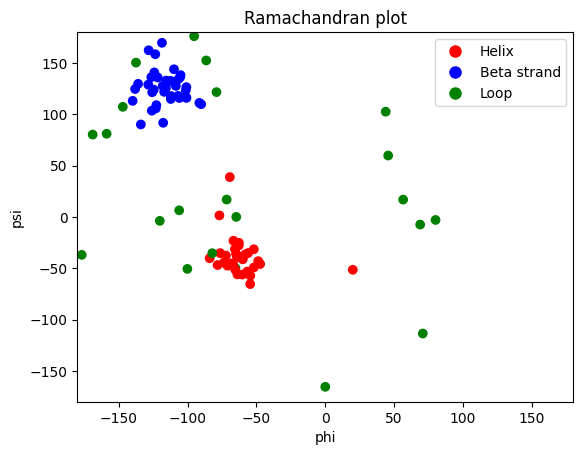

In [51]:
import matplotlib.pyplot as plt

phi_list = []
psi_list = []
ss_list = []
for res in range(1, pose.size() + 1):
    phi_list.append(pose.phi(res))
    psi_list.append(pose.psi(res))
    ss_list.append(ss[res - 1])

# color by secondary structure
plt.scatter(phi_list, psi_list, c=[{'H': 'r', 'E': 'b', 'L': 'g'}[_ss] for _ss in ss_list])
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Helix'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Beta strand'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Loop')])
plt.xlabel("phi")
plt.ylabel("psi")
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.title("Ramachandran plot")
plt.show()

我们也可以看一下这个蛋白质中的chi1角的分布。

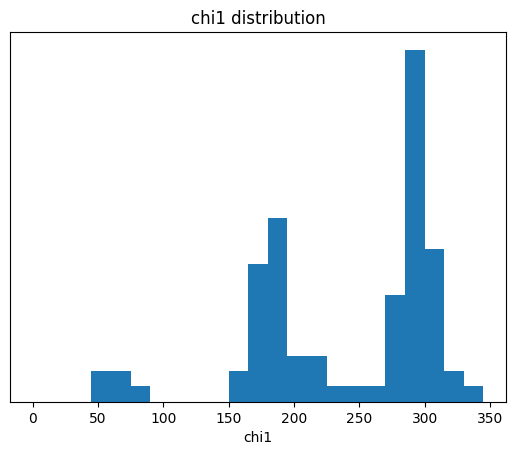

In [52]:
chi1s = []
for res_id in range(1, pose.size() + 1):
    res = pose.residue(res_id)
    nchi = res.nchi()
    if nchi >= 1:
        chi1s.append(res.chi(1))
chi1s = [chi + 360 if chi < 0 else chi for chi in chi1s]
x_axis = range(0, 360, 15)
plt.hist(chi1s, bins=x_axis)
plt.xlabel("chi1")
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("chi1 distribution")
plt.show()

# Section 2: Energy

经过第一章的学习，我们知道在pyrosetta中通过Pose储存构象的所有信息。

对于一个大分子构象而言，例如一个简单的含有一个蛋白Model的PDB文件，Rosetta对其中构象的处理主要分为全原子描述（Full atom representation）和质心描述（centriod representation）。

全原子描述，即对蛋白的所有原子都采用精确（x, y, z）坐标进行描述的方法。相比之下，质心描述保留骨架部分的精确全原子描述，但简化了氨基酸残基的侧链，通过对残基整体性质（坐标、原子质量、体积等）计算构建出一个假原子（pseudo atom，又称CEN原子），以该假原子作为原本侧链剩余部分的描述。侧链质心的位置基于侧链整体的质心决定，而假原子的大小由侧链的平均大小决定。可见，这种处理方式简化了蛋白构象，或者说丢失了部分信息，是一种“粗粒化”的描述。

---

问题一：为什么要费事进行“粗粒化”，而不全部采取精确全原子描述？

理想的情况而言，当我们拥有无尽的时间和无限的计算能力，我们当然是希望所有的体系优化的时候都能够使用全原子表示进行。但往往这是不切实际的，这是出现了简化的质心表示的第一个原因。其次，选择质心表示也可以让能量面比之于全原子表示更为平坦，更有效率地在空间中进行大规模采样，也更容易通过蒙特卡洛标准。（全原子表示的能量面非常崎岖，在执行蒙特卡洛搜索的时候，很多的搜索都会被蒙特卡洛规则拒绝掉而大概率陷入局域最小值）

---

问题二：质心模式的缺点是什么？

前文提过，质心描述以牺牲分辨率、丢失信息为代价而获得较快的构象空间搜索效率。这种信息的丢失，主要是侧链，例如侧链的氢键作用、侧链范式作用等细节，就没有被显式捕获到。相比之下，rosetta中会通过成对的统计学势能（pair-wise statistical potenhtial）和范式作用的范围型近似(VdW sphere approximation)去隐式捕获这些作用，但是这种处理是近似的、不精确的。

---

总结

这种两种原子模型在rosetta大部分protocal中都会涉及到。基本思路：首先通过质心粗颗粒描述快速搜索大量的构象空间，称为“low-resolution/Coarse-grain phase”，这样可以快速在能量面上找到能量较低的范围；然后通过全原子描述在该范围内进一步精确、优化地寻找低能构象的细节，称为“high-resolution refinement phase”。

In [53]:
# 我们可以通过 SwitchResidueTypeSetMover 实现全原子和质心之间的转换
from pyrosetta.rosetta.protocols.simple_moves import SwitchResidueTypeSetMover

to_centroid = SwitchResidueTypeSetMover("centroid")
to_fullatom = SwitchResidueTypeSetMover("fa_standard")

print(pose.is_fullatom()) # True

to_centroid.apply(pose)
print(pose.is_fullatom()) # False
pose.dump_pdb("1QYS.centroid.pdb")

to_fullatom.apply(pose)
print(pose.is_fullatom()) # True
pose.dump_pdb("1QYS.fullatom.pdb")

# 打开PDB看一下吧！


True
core.chemical.GlobalResidueTypeSet: Finished initializing centroid residue type set.  Created 69 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 0.020111 seconds.
False
True


True

蛋白质建模时面对的第一个直观的问题是: 给定一个构象，如何判断它建模质量好坏？
<!-- ![](./img/energy_good_or_bad.jpg) -->
<!-- image too large, scale it -->
<img src="./img/energy_good_or_bad.jpg" width = "50%" height = "50%" div align=center />

如果让你从直觉上去判断，上述绿色和紫红色的蛋白结构，哪个更加的稳定，该如何判断呢？

如果是比较有经验的人士，会认为绿色的模型更接近于真实的蛋白结构，原因是蛋白质往往依靠疏水相互作用驱使折叠成能量最低的状态，而粉红色的右下角处的α螺旋与周围的结合紧密程度较差，蛋白质存在空腔。

如果我们使用Rosetta能量函数去打分，那么绿色模型的能量也显著低于粉红色的模型。也就是说Rosetta的能量函数与我们直觉的判断结果一致。那么有趣的问题来了，Rosetta能量函数为何可以较为准确地评估模型的好坏？

<img src="./img/energy_good_or_bad2.jpg" width = "50%" height = "50%" div align=center />

Rosetta能量函数由一系列可衡量的几何统计或经典物理相互作用能量经过加权后得到的函数形式。在给定原子坐标的条件下，评估原子之间的相互作用能量的大小。在之前版本的Rosetta中，能量的单位是REU(Rosetta Energy Unit)，而最新版本的full-atom打分函数(ref2015))经过矫正，目前单位为kcals/mol。

Rosetta中能量项可以分为以下三类：
1. One Body：通常这类打分项只和单个氨基酸构象有关，比如骨架的二面角，侧链的rotamer构象等；
2. One Body：通常这类打分项只和单个氨基酸构象有关，比如骨架的二面角，侧链的rotamer构象等；
3. Whole Body：从整体几何性质或其他的指标考虑蛋白质的能量，如蛋白质的回旋半径，二级结构组成等可统计的量。(大多数据centroid能量函数使用，粗略描述蛋白性质)

简单来说在得到了多个打分项后，通常会在给定一些数据集条件下，通过拟合权重，就可以表现比较良好的打分函数。这些能量函数的组合方式与权重选择往往与具体的应用场景、个人习惯有关。在许多使用Rosetta的实验室中，都会根据自己的经验和数据集，对Rosetta的能量函数进行调整。如果你下载相关论文的Supplementary Material，你会发现很多实验室都会提供自己调整后的能量函数（比如 [蛋白质top7的设计](https://www.science.org/doi/suppl/10.1126/science.1089427/suppl_file/1089427s.pdf) ）。

在漫长（也不是很漫长）的发展历史中，人们总结出来了一些常用的能量函数组合，比如 ref2015（see more at [link1](https://docs.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types) and [link2](https://docs.rosettacommons.org/docs/latest/rosetta_basics/scoring/Scorefunction-History))。

<!-- replace link with text -->
<!-- [Rosetta Energy Function](https://www.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types) -->

In [54]:
from pyrosetta import create_score_function

# 初始化一个最常用的REF2015的打分函数对象
my_scorefxn = create_score_function('ref2015')
# 打印定义的打分函数的详细内容，包括权重、各个能量选项设置等。
print(my_scorefxn)

ScoreFunction::show():
weights: (fa_atr 1) (fa_rep 0.55) (fa_sol 1) (fa_intra_rep 0.005) (fa_intra_sol_xover4 1) (lk_ball_wtd 1) (fa_elec 1) (pro_close 1.25) (hbond_sr_bb 1) (hbond_lr_bb 1) (hbond_bb_sc 1) (hbond_sc 1) (dslf_fa13 1.25) (omega 0.4) (fa_dun 0.7) (p_aa_pp 0.6) (yhh_planarity 0.625) (ref 1) (rama_prepro 0.45)
energy_method_options: EnergyMethodOptions::show: aa_composition_setup_files: 
EnergyMethodOptions::show: mhc_epitope_setup_files: 
EnergyMethodOptions::show: netcharge_setup_files: 
EnergyMethodOptions::show: aspartimide_penalty_value: 25
EnergyMethodOptions::show: etable_type: FA_STANDARD_DEFAULT
analytic_etable_evaluation: 1
EnergyMethodOptions::show: method_weights: ref 1.32468 3.25479 -2.14574 -2.72453 1.21829 0.79816 -0.30065 2.30374 -0.71458 1.66147 1.65735 -1.34026 -1.64321 -1.45095 -0.09474 -0.28969 1.15175 2.64269 2.26099 0.58223
EnergyMethodOptions::show: method_weights: free_res
EnergyMethodOptions::show: unfolded_energies_type: UNFOLDED_SCORE12
EnergyMeth

In [55]:
# 使用打分函数计算pose的能量
# 在这之前，我们重新加载一下pose，因为在之前的操作中，我们的pose已经被修改了
pose = pose_from_pdb("./1QYS.clean.pdb")

core.import_pose.import_pose: File './1QYS.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NZ  on residue LYS 13
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE1 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CE2 on residue PHE 15
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CZ  on residue PHE 15
core.conformation.Conformation: [ WARNING ]

In [56]:
score = my_scorefxn(pose)
print(score)
# 我们可以看到 REF2015 的总能量是 239 左右
# 这个能量值越小，代表构象越稳定
# 这个能量值并不是越小越好（有时候），因为“稳定”并不是我们唯一的目标，有时候我们需要的是“活性”等其他性质

239.2789229302296


In [57]:
# 我们可以查看能量的组成与权重
my_scorefxn.show(pose)

# 如果想要了解更多，请参考 https://docs.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types
# 或者逐项搜索

core.scoring.ScoreFunction: 
------------------------------------------------------------
 Scores                       Weight   Raw Score Wghtd.Score
------------------------------------------------------------
 fa_atr                       1.000    -481.446    -481.446
 fa_rep                       0.550     346.409     190.525
 fa_sol                       1.000     307.299     307.299
 fa_intra_rep                 0.005     287.021       1.435
 fa_intra_sol_xover4          1.000      19.576      19.576
 lk_ball_wtd                  1.000      -7.840      -7.840
 fa_elec                      1.000    -104.865    -104.865
 pro_close                    1.250       0.000       0.000
 hbond_sr_bb                  1.000     -26.819     -26.819
 hbond_lr_bb                  1.000     -31.013     -31.013
 hbond_bb_sc                  1.000      -2.475      -2.475
 hbond_sc                     1.000      -3.900      -3.900
 dslf_fa13                    1.250       0.000       0.000
 omega  

In [58]:
# 此外pose对象在经过定义的能量函数计算后，会将最近一次的打分结果储存在pose对象的energy对象下
# 通过energy对象可以获取未取权重的、单个残基的各个能量项打分值

# 查看第一个残基的能量项分解如下：
pose.energies().show(1)

core.scoring.Energies: E               fa_atr        fa_rep        fa_sol  fa_intra_repfa_intra_sol_x   lk_ball_wtd       fa_elec     pro_close   hbond_sr_bb   hbond_lr_bb   hbond_bb_sc      hbond_sc     dslf_fa13         omega        fa_dun       p_aa_pp yhh_planarity           ref   rama_prepro
core.scoring.Energies: E(i)   1         -2.34          0.67          2.96          1.31          0.25         -0.22         -0.23          0.00          0.00          0.00          0.00         -0.20          0.00          0.15         13.21          0.00          0.00         -2.15          0.00


In [59]:
# 我们也可以指定查看某个残基的某个能量项
# 比如：查看第一个残基的fa_atr得分值
from pyrosetta.rosetta.core.scoring import fa_atr
pose.energies().residue_total_energies(1)[fa_atr]

-2.3403351385779367

In [60]:
# 当然，我们也可以自定义一个我们自己的打分函数，这可以通过 import 我们想要的 scoring 模块与 ScoreFunction 对象的构建来实现
from pyrosetta.rosetta.core.scoring import ScoreFunction
from pyrosetta.rosetta.core.scoring import fa_atr, fa_rep

# 创建一个空的打分函数对象
my_scorefxn = ScoreFunction()
# 设置打分函数的权重
my_scorefxn.set_weight(fa_atr, 1.0)
my_scorefxn.set_weight(fa_rep, 1.0)

# 使用自定义的打分函数计算pose的能量
score = my_scorefxn(pose)
print(score)

# 我们可以查看能量的组成与权重
my_scorefxn.show(pose)


-135.03635488387584
core.scoring.ScoreFunction: 
------------------------------------------------------------
 Scores                       Weight   Raw Score Wghtd.Score
------------------------------------------------------------
 fa_atr                       1.000    -481.446    -481.446
 fa_rep                       1.000     346.409     346.409
---------------------------------------------------
 Total weighted score:                     -135.036


# Feel free to play with the code below to get a better understanding of the concepts above!

## you can play at here

## 下面是一些 optional 的 **open** question，如果你学有余力且时间充裕且不知道玩些什么，可以尝试回答一下这些问题
1. 在上面的代码中，我们画出了1QYS的ramachandran plot与chi1角的分布，你能否画出另一个蛋白质的ramachandran plot与chi1角（或者其他角）的分布？他们是否与你观察到的结构和所学的知识一致？又与1QYS有何不同？
2. 在1QYS的ramachandran plot中，有少部分的氨基酸落在了“negative phi”区域，他们是什么种类的氨基酸？分布在什么样的二级结构中？为什么他们的phi角为负？
3. 单独画出某个蛋白质中所有 glycine 以及 pre-proline（proline前面的氨基酸）的 ramachandran plot，你能观察到什么现象？为什么？（如果现象不明显，可以下载更多的蛋白质进行观察）
4. 你可以通过下列代码
    ```python
    from pyrosetta.rosetta.protocols.relax import * 
    relax = FastRelax() 
    relax.set_scorefxn(scorefxn) 
    relax.apply(pose)
    ```
    根据指定的能量函数对pose进行relax，relax后的结构发生了什么变化？能量是否有所下降？